In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
df=pd.read_csv('/content/CO2 Emissions_Canada.csv')

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
df.isnull().sum()

,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0


In [6]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [9]:
df.duplicated().sum()

np.int64(1103)

In [7]:
df.dropna(inplace=True)

In [8]:
df_encoded = pd.get_dummies(df, drop_first=True)

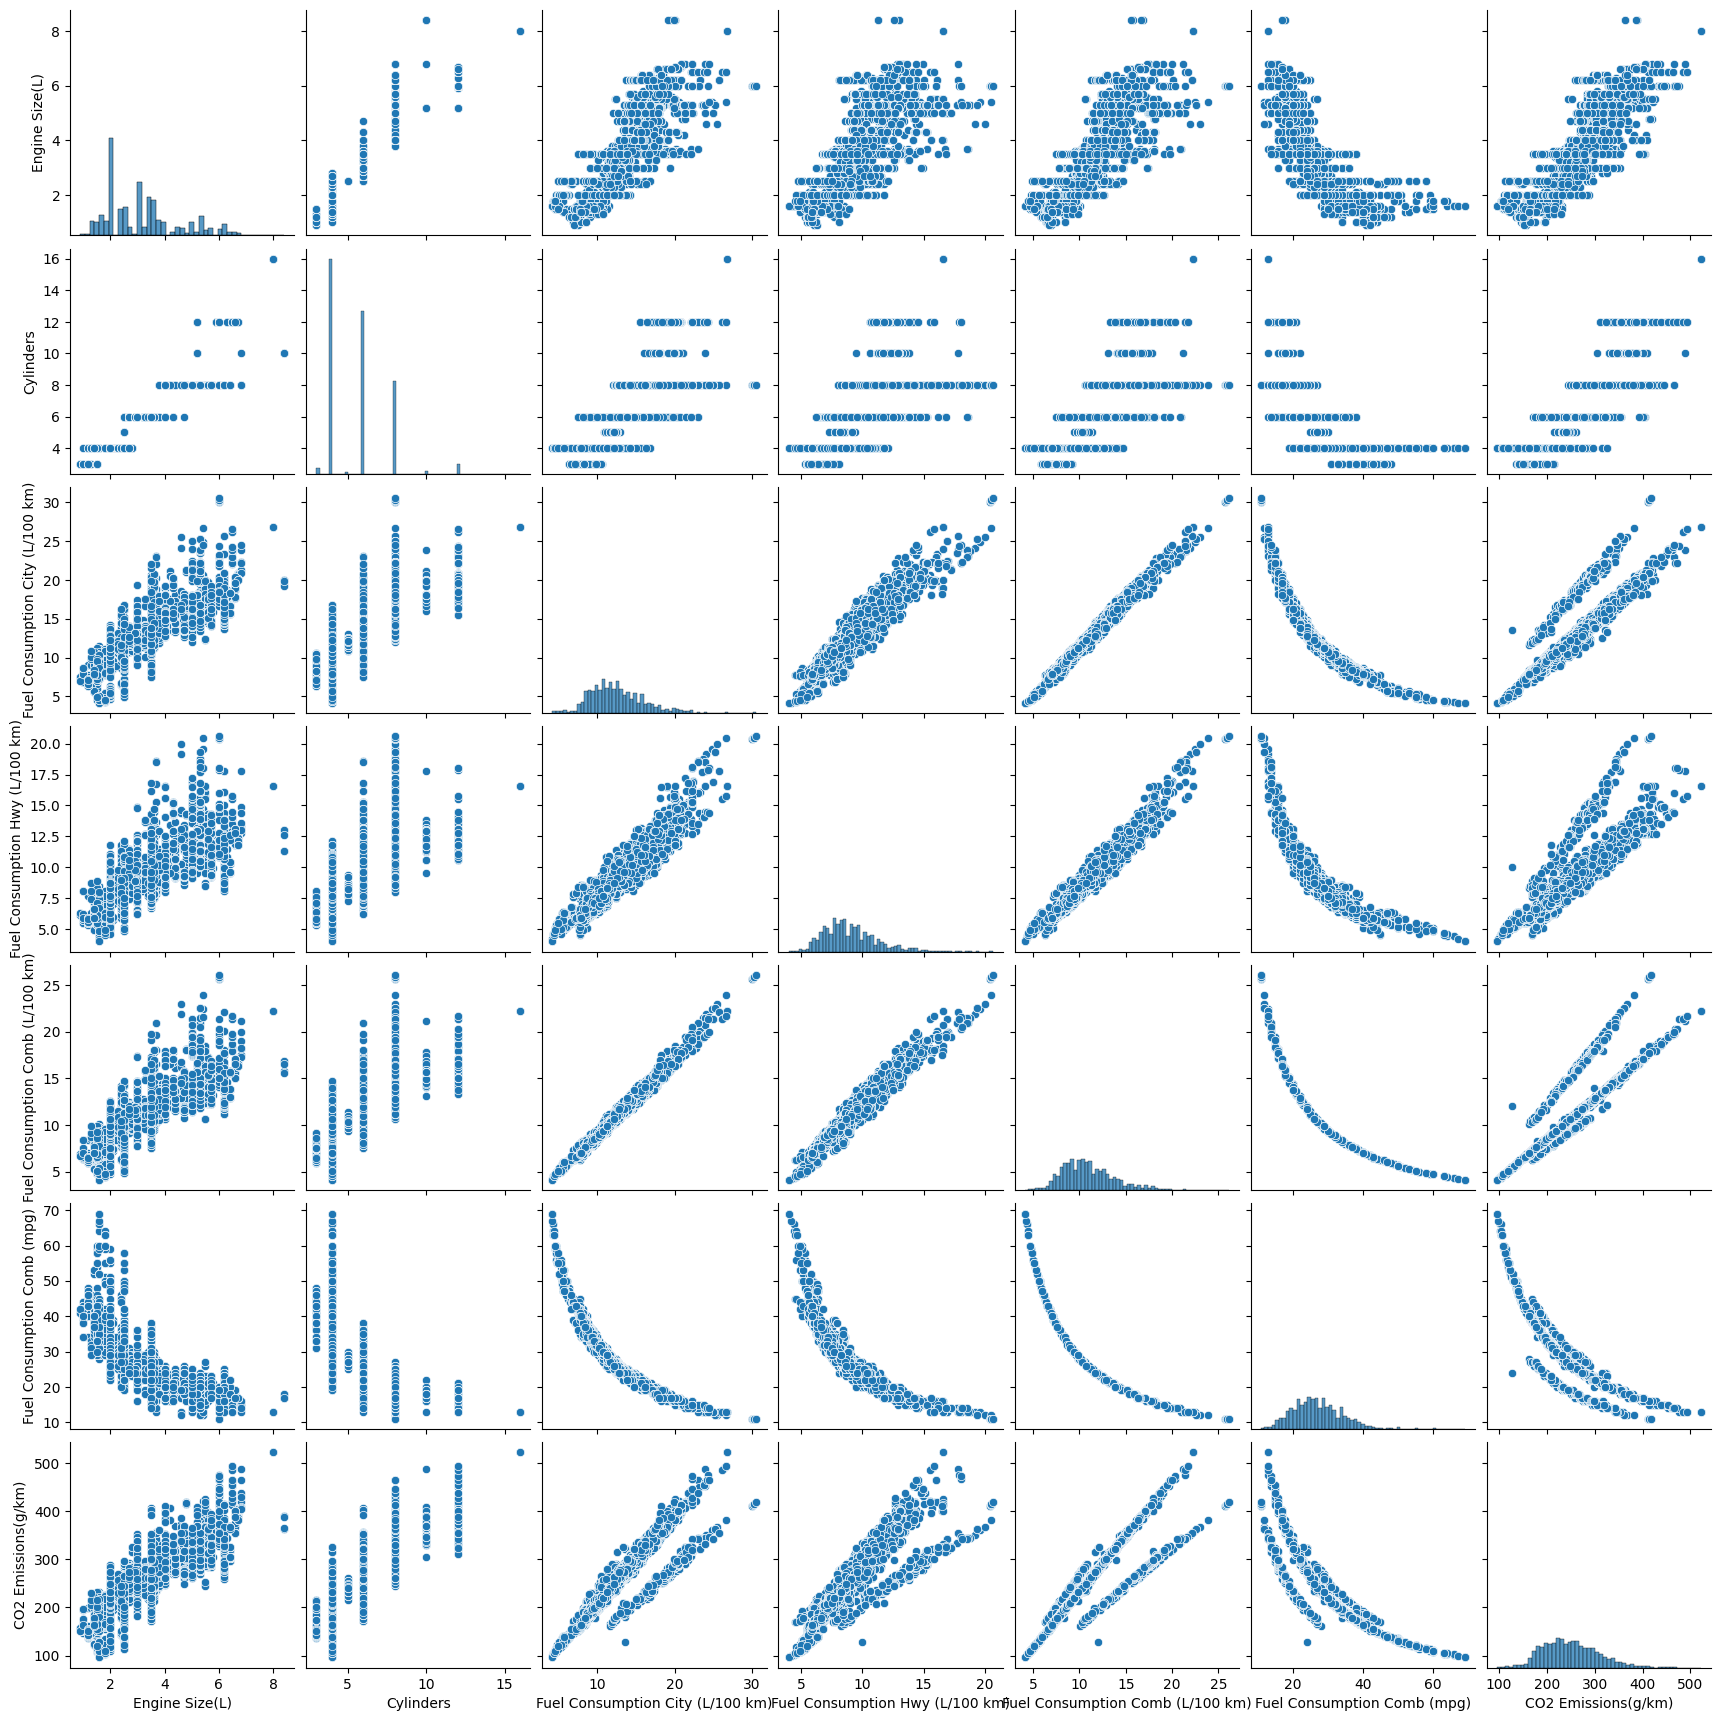

In [13]:
sns.pairplot(df);

/tmp/ipython-input-15-2553565200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Vehicle Class', palette='summer')


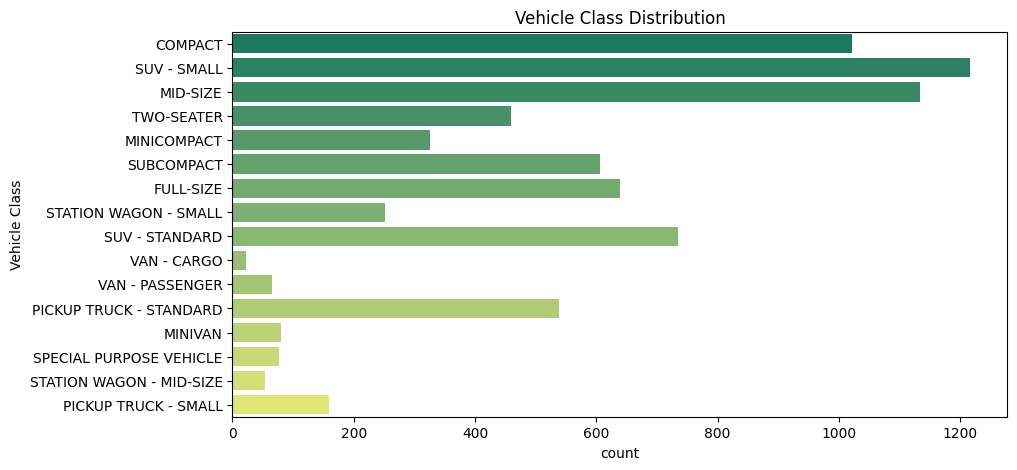

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Vehicle Class', palette='summer')
plt.title('Vehicle Class Distribution')
plt.show()

/tmp/ipython-input-17-1353905214.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Vehicle Class", y="CO2 Emissions(g/km)", palette="YlGn")


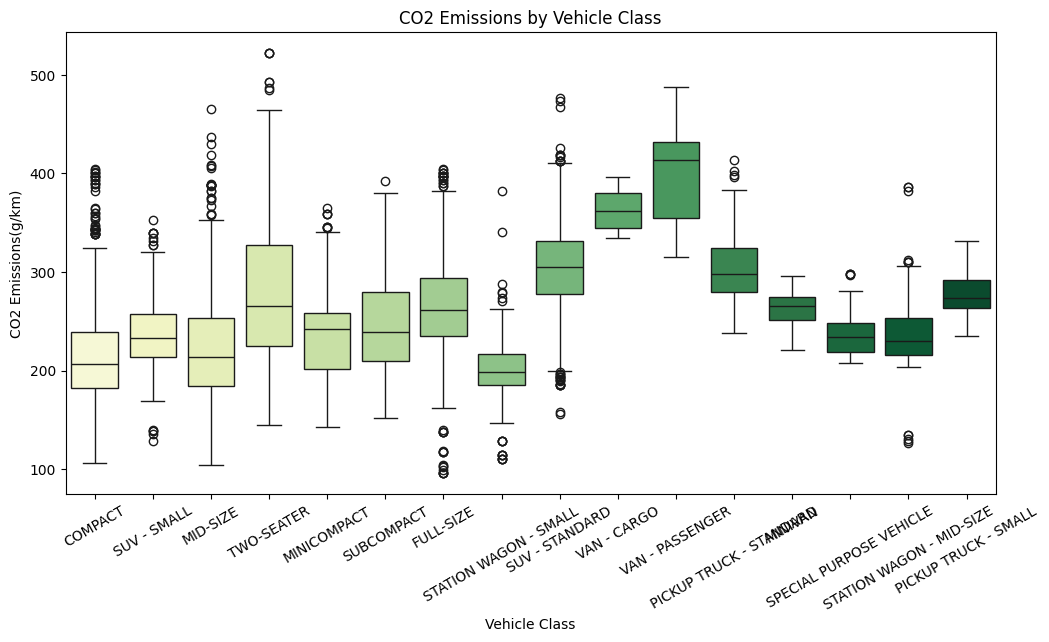

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Vehicle Class", y="CO2 Emissions(g/km)", palette="YlGn")

plt.title("CO2 Emissions by Vehicle Class")
plt.xticks(rotation=30)

plt.show()

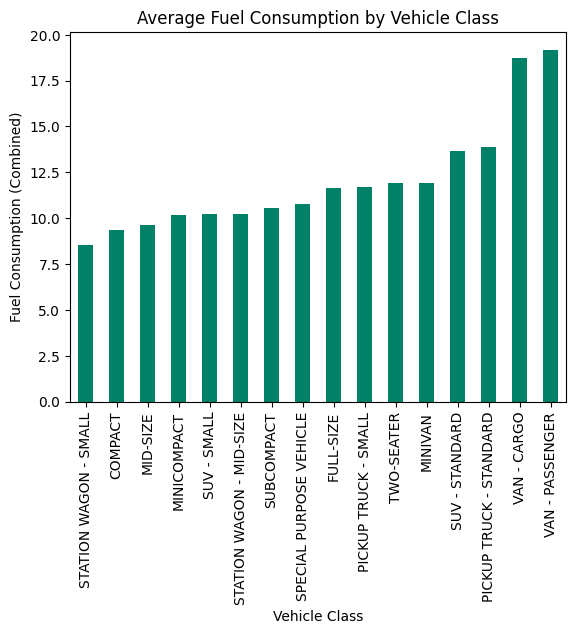

In [19]:
avg_fuel = df.groupby('Vehicle Class')['Fuel Consumption Comb (L/100 km)'].mean().sort_values()
avg_fuel.plot(kind='bar', cmap='summer')

plt.title('Average Fuel Consumption by Vehicle Class')
plt.ylabel('Fuel Consumption (Combined)')

plt.show()

In [20]:
X = df_encoded.drop("CO2 Emissions(g/km)", axis=1)
y = df_encoded["CO2 Emissions(g/km)"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.9936855988550253
RMSE: 4.660384885888425


In [24]:
importances = model.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

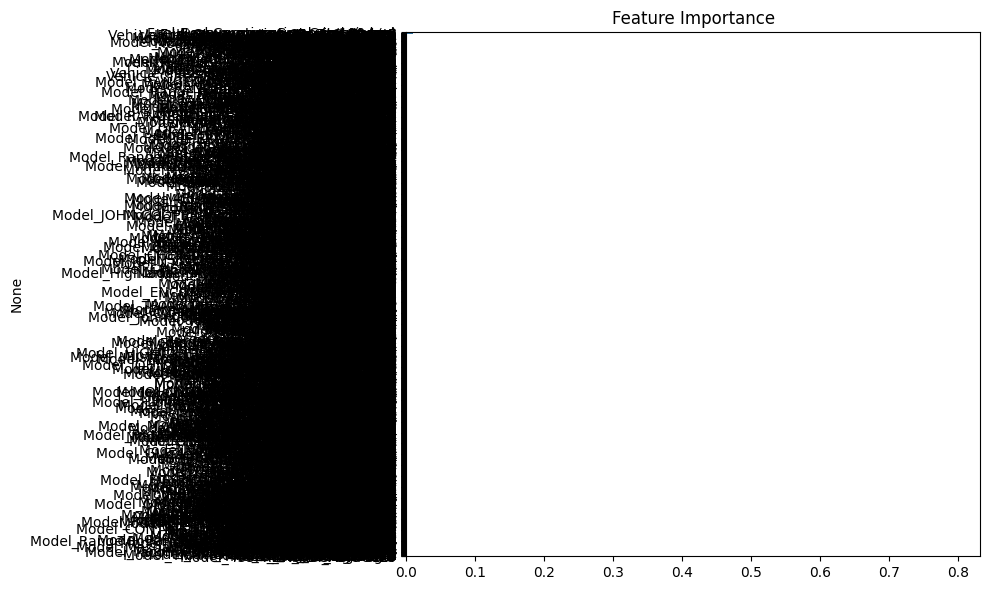

In [26]:
importances = model.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [28]:
joblib.dump(model, "co2_model.pkl")
print("Model saved as 'co2_model.pkl'")

Model saved as 'co2_model.pkl'


In [29]:
import gradio as gr
import joblib
import pandas as pd

In [30]:
model = joblib.load("/content/co2_model.pkl")

In [31]:
input_features = [
    'Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
    'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
    'Fuel Consumption Comb (mpg)',
    'Fuel Type_D', 'Fuel Type_E', 'Fuel Type_N', 'Fuel Type_X', 'Fuel Type_Z',
    'Transmission_AS5', 'Transmission_AS6', 'Transmission_AS7',
    'Transmission_AV7', 'Transmission_AV8', 'Transmission_M5',
    'Transmission_M6', 'Transmission_UNKNOWN'
]

In [32]:
def predict_co2(*inputs):
    input_dict = dict(zip(input_features, inputs))
    input_df = pd.DataFrame([input_dict])
    prediction = model.predict(input_df)[0]
    return f"Predicted CO2 Emissions: {prediction:.2f} g/km"

In [33]:
input_components = [
    gr.Number(label=feat) for feat in input_features
]

gr.Interface(
    fn=predict_co2,
    inputs=input_components,
    outputs=gr.Textbox(label="CO2 Emissions Prediction"),
    title="Canada Vehicle CO2 Emissions Predictor",
    description="Enter vehicle features to predict CO2 emissions (g/km)"
).launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://752d671107794a7816.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
